# Understanding Hierarchical Clustering
> We will be looking at Agglomerative Hierarchical Clustering.

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [clustering]

In this blog post, we will be looking at **Agglomerative Hierarchical Clustering**. This is a bottom up approach of hierarchical clustering.

In [3]:
# import libraries
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

---
### Generate random data

We will be generating a set of data using the make_blobs class.  
The input parameters for this class are:
- n_samples: The total number of points qually divided among clusters.
- centers: The number of centers to generate, or the fixed center locations.
- cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters.

We will save the result to X1 and y1.

In [5]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

Plot the scatter plot of the randomly generated data.

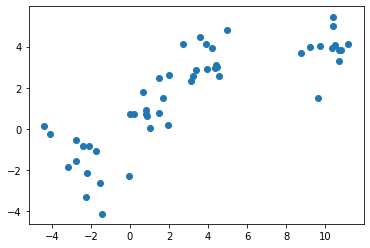

In [7]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

---
### Agglomerative clustering
Cluster the random data points we just created.  
The AgglomerativeClustering class requires two inputs:
- n_clusters: The number of clusters to form as well as the number of centroids to generate.
- linkage: Which linkage criterion to use. This determines which distance to use between sets of observations. The algorithm will merge the pairs of clusters that minimize this criterion.

In [8]:
agglom = AgglomerativeClustering(n_clusters=4, linkage='average')

Fit the model with X2 and y2 from the generated data above.

In [9]:
agglom.fit(X1, y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

Plot the clustering.

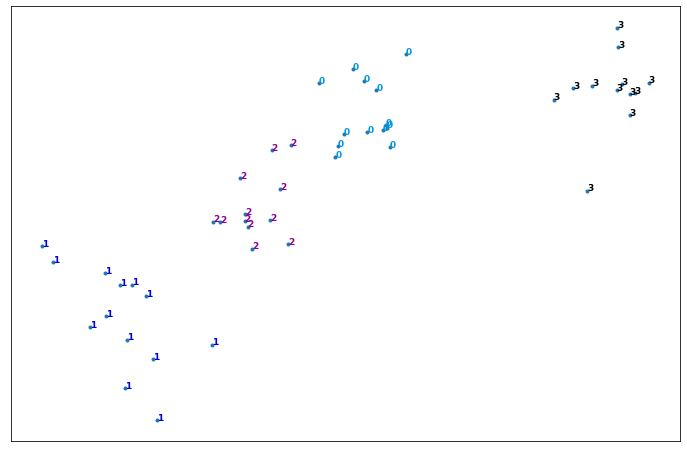

In [21]:
plt.figure(figsize=(12,8))

# scale down the data points to prevent scattering

# create a minimum and maximum range of X1
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
# get the average distance for X1
X1 = (X1 - x_min) / (x_max - x_min)

# loop to display all of the datapoints
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])

# display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')

# display the plot
plt.show()

---
### Dendrogram

A distance matrix contains the distance from each point to every other point of a dataset.  
Use the function distance_matrix, which requires two inputs. Use the feature matrix, X2, as both inputs, and save the distance matrix to a variable called dist_matrix.  One way to check that your matrix is correct is to make sure that the distance values are symmetric, with a diagonal of zeros.

In [16]:
dist_matrix = distance_matrix(X1, X1)
print(dist_matrix)

[[0.         0.10264836 0.75840228 ... 0.71198038 0.58237479 0.42606018]
 [0.10264836 0.         0.67498119 ... 0.62861156 0.48764469 0.33707566]
 [0.75840228 0.67498119 0.         ... 0.04644316 0.22929692 0.3396303 ]
 ...
 [0.71198038 0.62861156 0.04644316 ... 0.         0.19162587 0.29360964]
 [0.58237479 0.48764469 0.22929692 ... 0.19162587 0.         0.1638079 ]
 [0.42606018 0.33707566 0.3396303  ... 0.29360964 0.1638079  0.        ]]


Save the result to a variable called Z.

In [17]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


Hierarchical clustering is typically visualized as a dendrogram. Each erge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

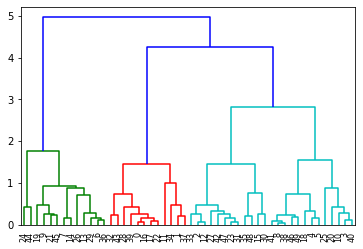

In [32]:
dendro = hierarchy.dendrogram(Z)